# LGBM & XGBM

### TASKS:

#### Exploratory Data Analysis (EDA):
1.	Load the Titanic dataset using Python's pandas library.
2.	Check for missing values.
3.	Explore data distributions using histograms and box plots.
4.	Visualize relationships between features and survival using scatter plots and bar plots.
   
#### Data Preprocessing:
1.	Impute missing values.
2.	Encode categorical variables using one-hot encoding or label encoding. 
3.	If needed you can apply more preprocessing methods on the given dataset.
   
#### Building Predictive Models:
1.	Split the preprocessed dataset into training and testing sets.
2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.	Build predictive models using LightGBM and XGBoost algorithms.
4.	Train the models on the training set and evaluate their performance on the testing set.
5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

#### Comparative Analysis:
1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Datasets
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### *1. Exploratory Data Analysis*

In [4]:
# Check for missing values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*Null values are present in columns **Age**, **Cabin** and **Embarked***

In [5]:
# Check for duplicates
if(train_df.duplicated().sum()!=0):
    print("DUPLICATES ARE PRESENT")
    print("No.of duplicted rows: ", train_df.duplicted().sum())
    # print duplicated values
    train_df[train_df.duplicated(keep = False)]
else:
    print("NO DUPLICATES")

NO DUPLICATES


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Data Visualization
train_cont = train_df[['Age','Fare']]
train_cont

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


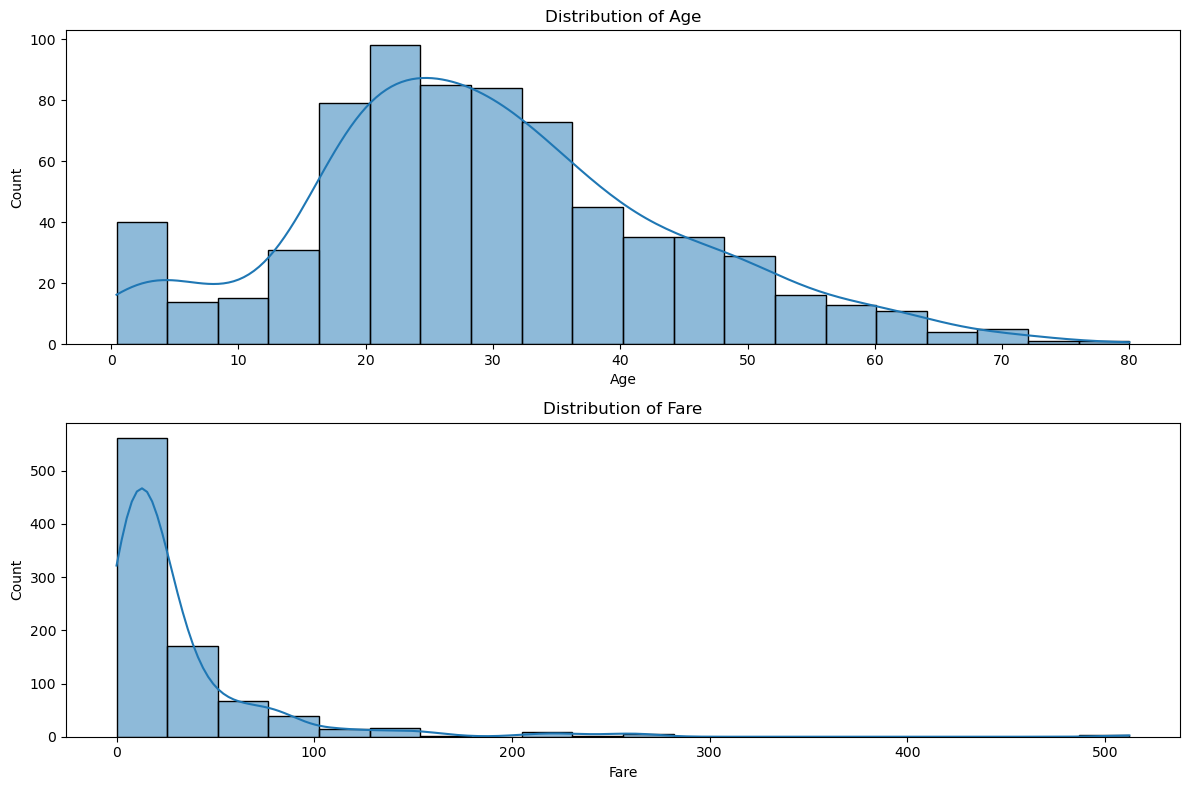

In [8]:
# Histogram
plt.figure(figsize = (12,8))
for i, col in enumerate(train_cont.columns):
    plt.subplot(2,1,i+1)
    sns.histplot(train_df[col].dropna(), kde = True, bins = 20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

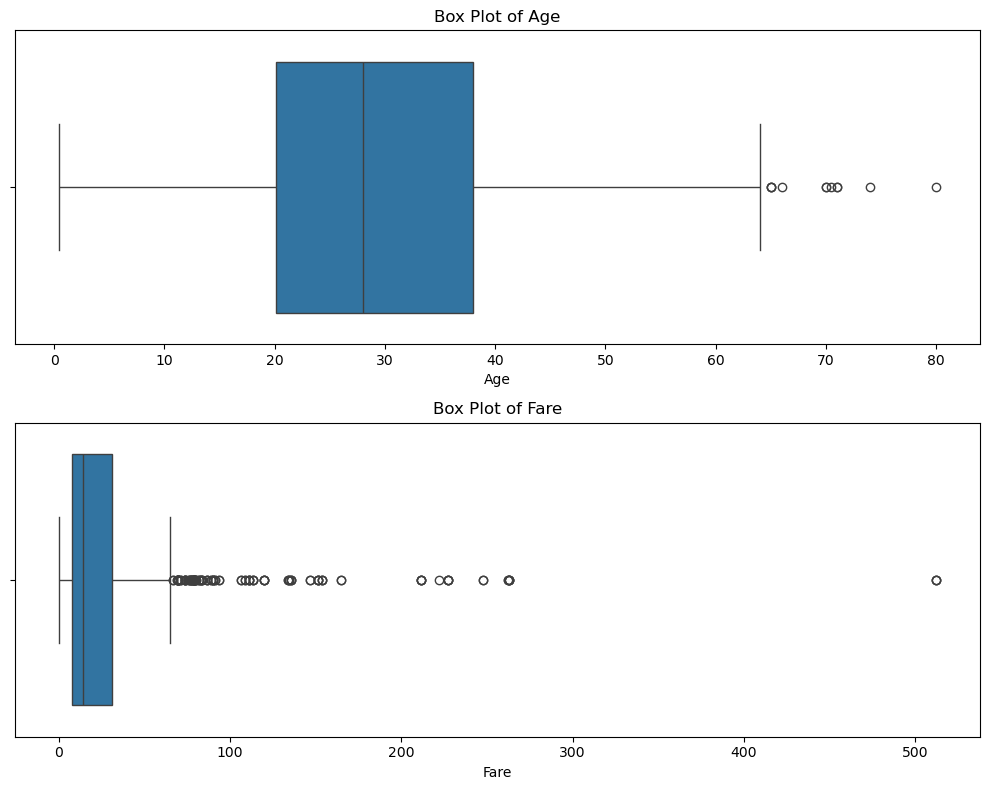

In [9]:
# BOXPLOT
plt.figure(figsize = (10,8))
for i, col in enumerate(train_cont.columns):
    plt.subplot(2,1,i+1)
    sns.boxplot(x = train_df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

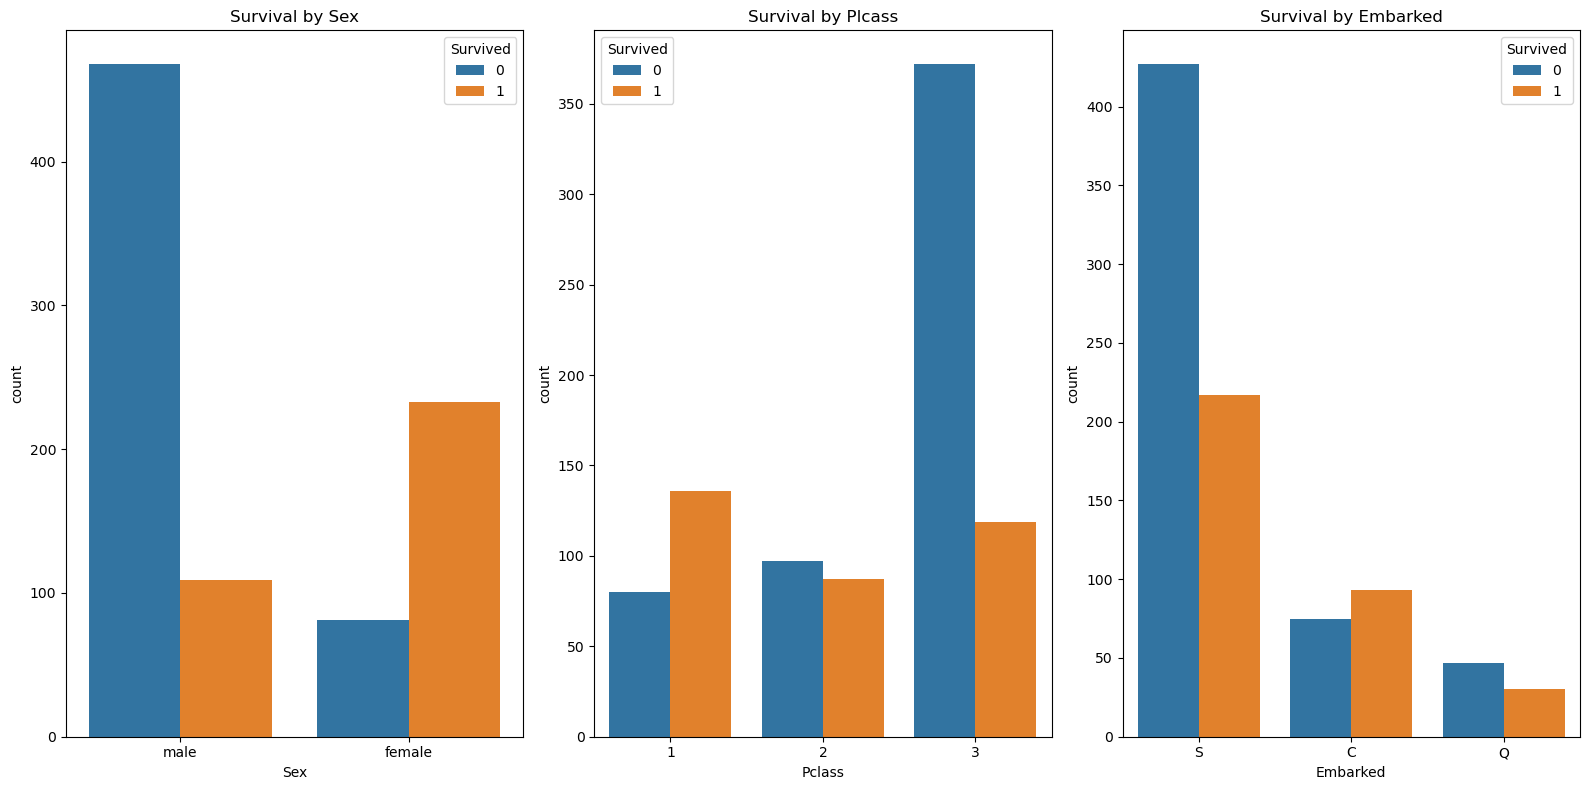

In [10]:
# Visualizing relationship between features and survival
# Bar plots: Categorical features vs survival
plt.figure(figsize = (16,8))

plt.subplot(1,3,1)
sns.countplot(data = train_df, x = "Sex", hue = "Survived")
plt.title("Survival by Sex")

plt.subplot(1,3,2)
sns.countplot(data = train_df, x = "Pclass", hue = "Survived")
plt.title("Survival by Plcass")

plt.subplot(1,3,3)
sns.countplot(data = train_df, x = "Embarked", hue = "Survived")
plt.title("Survival by Embarked")

plt.tight_layout()
plt.show()

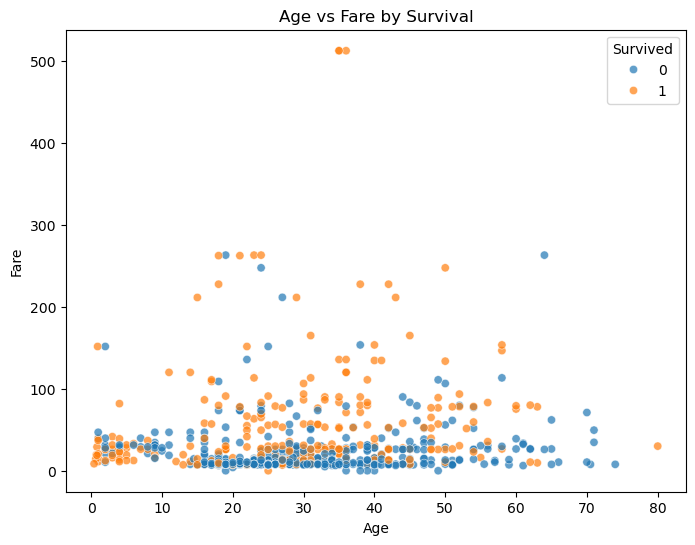

In [11]:
# Scatter plot: Age vs Fare coloured by Survived
plt.figure(figsize = (8,6))
sns.scatterplot(data = train_df, x = 'Age', y = 'Fare', hue = 'Survived', alpha = 0.7)
plt.title("Age vs Fare by Survival")
plt.show()

### *2. DATA PREPROCESSING*

In [12]:
# Label encoding Sex and Embarked
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in ['Sex', 'Embarked']:
    train_df[column] = le.fit_transform(train_df[column])

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [13]:
# Impute Missing values
# Age with median
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

In [14]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
# drop PassengerId ,Name, Cabin and Ticket variables from train_df dataset
train_df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [16]:
# Display the counts for Pclass, Parch, and Embarked variables
print("Counts for Pclass:")
print(train_df['Pclass'].value_counts())
print("\n")

print("Counts for Parch:")
print(train_df['Parch'].value_counts())
print("\n")

print("Counts for SibSp:")
print(train_df['SibSp'].value_counts())
print("\n")

print("Counts for Embarked:")
print(train_df['Embarked'].value_counts())

Counts for Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Counts for Parch:
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


Counts for SibSp:
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


Counts for Embarked:
Embarked
2    644
0    168
1     77
3      2
Name: count, dtype: int64


In [17]:
# Standardize Age and Fare
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df[['Age','Fare']] = scaler.fit_transform(train_df[['Age','Fare']])
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.565736,1,0,-0.502445,2
1,1,1,0,0.663861,1,0,0.786845,0
2,1,3,0,-0.258337,0,0,-0.488854,2
3,1,1,0,0.433312,1,0,0.420730,2
4,0,3,1,0.433312,0,0,-0.486337,2


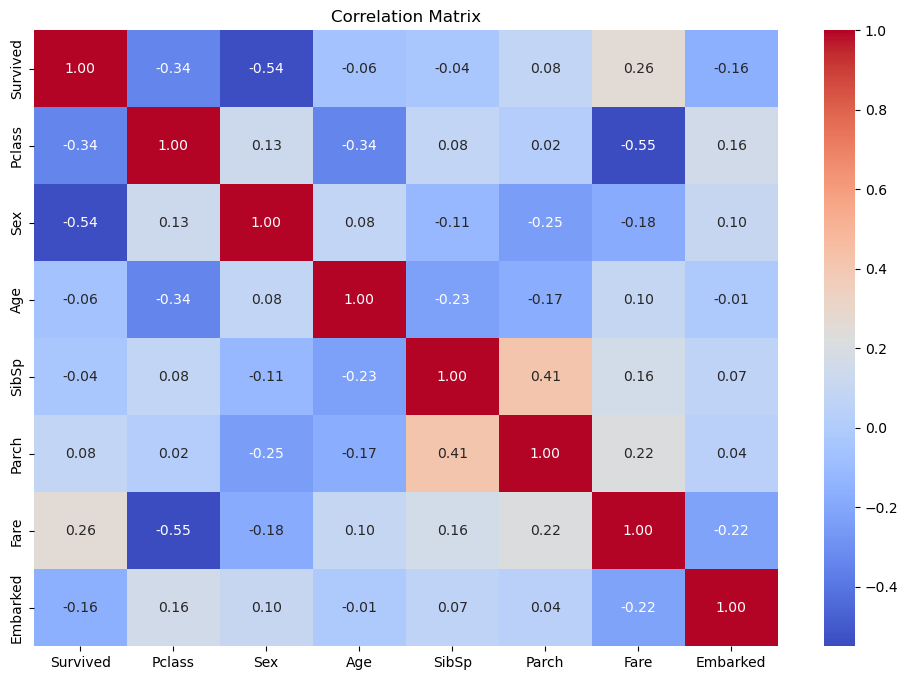

In [18]:
# Correlation 
plt.figure(figsize = (12, 8))
sns.heatmap(train_df.corr(), annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

### *3. Building Predictive Models*

In [19]:
! pip install lightgbm

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [21]:
# Define X and Y
X = train_df.drop('Survived', axis = 1)
Y = train_df['Survived']

In [22]:
# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 24, stratify = Y)

In [23]:
# Model Building -- LightGBM
lgb_model = LGBMClassifier(random_state = 42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

In [24]:
# Predictions and Evaluation
y_pred_lgb = lgb_model.predict(X_test)
print("LightGBM Claasification Report:")
print(classification_report(y_test, y_pred_lgb))

LightGBM Claasification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       110
           1       0.83      0.83      0.83        69

    accuracy                           0.87       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179



In [25]:
# Model Building -- XGBoost
xgb_model = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state = 42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [26]:
# Predictions & Evaluation
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       110
           1       0.79      0.78      0.79        69

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [27]:
# Cross Validation
# Cross-validation accuracy (5-fold)
cv_score_lgb = cross_val_score(lgb_model, X, Y, cv = 5, scoring='accuracy').mean()
cv_score_xgb = cross_val_score(xgb_model, X, Y, cv = 5, scoring='accuracy').mean()

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [28]:
# Accuracy
print(f"LightGBM CV Accuracy: {cv_score_lgb:.4f}")
print(f"XGBoost CV Accuracy: {cv_score_xgb:.4f}")

LightGBM CV Accuracy: 0.8283
XGBoost CV Accuracy: 0.8182


In [29]:
# Hyperparameter Tuning -- LightGBM Tuning
from sklearn.model_selection import GridSearchCV
lgb_params = {'n_estimators': [100, 200, 300],
              'learning_rates': [0.05, 0.1],
              'num_leaves': [15, 31, 63]}
lgb_grid = GridSearchCV(LGBMClassifier(random_state = 42), lgb_params, cv = 3, scoring = 'accuracy')
lgb_grid.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Info] Number of positive: 182, number of negative: 292
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 161
[LightGBM] [Info] Number of data points in the train set: 474, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383966 -> initscore=-0.472747
[LightGBM] [Info] Start training from score -0.472747
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Info] Number of positive: 182, number of negative: 293
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if mem

GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=42),
             param_grid={'learning_rates': [0.05, 0.1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [15, 31, 63]},
             scoring='accuracy')

In [30]:
print("Best LightGBM params: ", lgb_grid.best_params_)

Best LightGBM params:  {'learning_rates': 0.05, 'n_estimators': 200, 'num_leaves': 15}


In [31]:
# Fit best models
best_lgb = lgb_grid.best_estimator_
best_lgb.fit(X_train, y_train)

# Predict
y_pred_lgb_best = best_lgb.predict(X_test)

# Evaluate
print("Tuned LightGBM:")
print(classification_report(y_test, y_pred_lgb_best))

[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Warning] Unknown parameter: learning_rates
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] Unknown parameter: learning_rates
Tuned LightGBM:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       110
           1       0.80      0.81      0.81        69

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [32]:
# XGBoost Tuning
xgb_params = {'n_estimators' : [100,200],
              'learning_rates': [0.05,0.1],
              'max_depth': [3,5,7,11]}
xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state = 42),
                        xgb_params, cv = 3, scoring = 'accuracy')
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rates': [0.05, 0.1],
                         'max_depth': [3, 5, 7, 11],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [33]:
print("Best XGBoost Params:", xgb_grid.best_params_)

Best XGBoost Params: {'learning_rates': 0.05, 'max_depth': 7, 'n_estimators': 100}


In [34]:
# Fit best models
best_xgb = xgb_grid.best_estimator_
best_xgb.fit(X_train, y_train)

# Predict
y_pred_xgb_best = best_xgb.predict(X_test)

# Evaluate
print("Tuned XGBoost:")
print(classification_report(y_test, y_pred_xgb_best))

Tuned XGBoost:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       110
           1       0.79      0.81      0.80        69

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



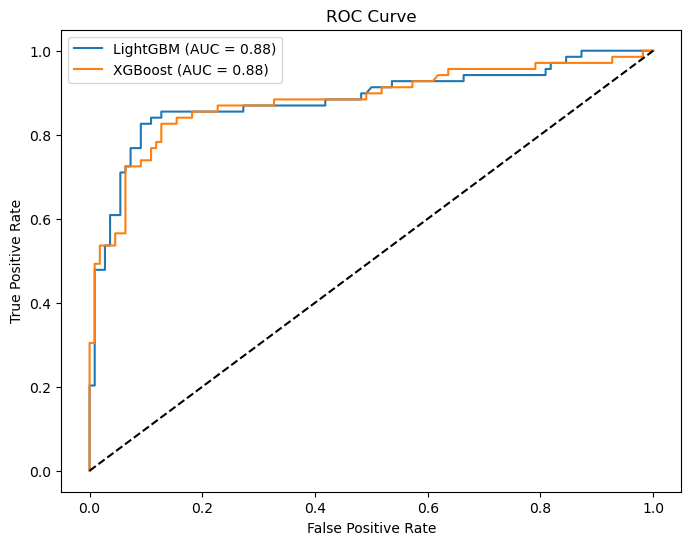

In [35]:
# ROC Curve
from sklearn.metrics import roc_curve, auc, roc_auc_score

# LightGBM ROC Curve
y_probs_lgb = lgb_model.predict_proba(X_test)[:, 1]
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_probs_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

# XGBoost ROC Curve
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_probs_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {roc_auc_lgb:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

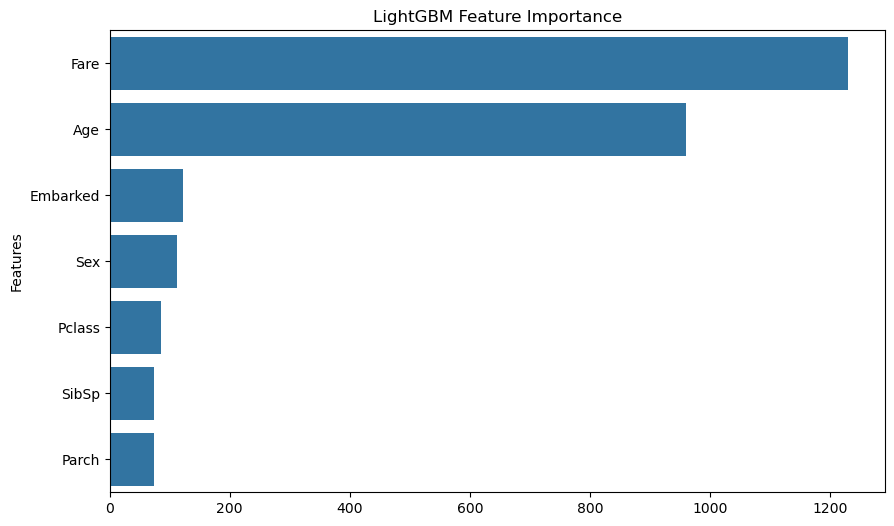

In [36]:
# Feature importance visualisation
# Feature importances for LightGBM
lgb_feat_imp = pd.Series(lgb_model.feature_importances_, index = X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=lgb_feat_imp.values, y=lgb_feat_imp.index)
plt.title('LightGBM Feature Importance')
plt.ylabel('Features')
plt.show()

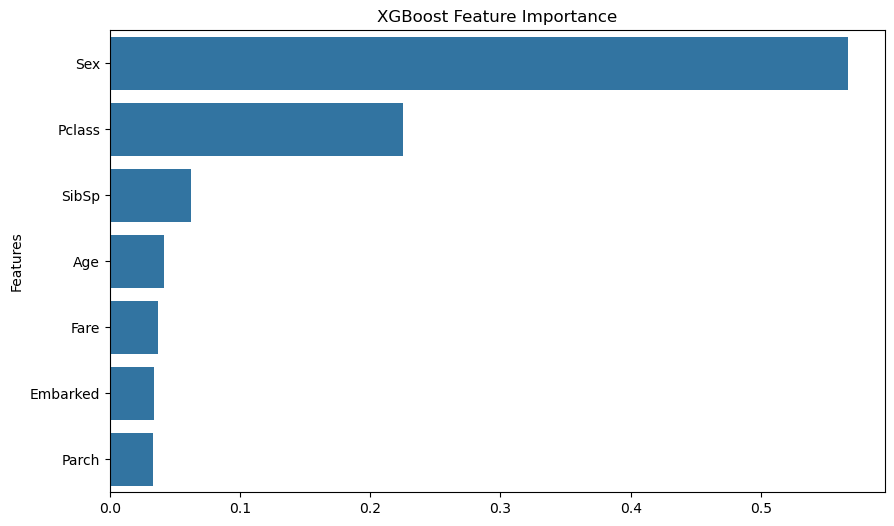

In [37]:
# Feature importances for XGBoost
xgb_feat_imp = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_feat_imp.values, y=xgb_feat_imp.index)
plt.title('XGBoost Feature Importance')
plt.ylabel('Features')
plt.show()

### *4. Comparative Analysis*

In [38]:
# Comparing Performance Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# LightGBM metrics
metrics_lgb = {
    'Accuracy': accuracy_score(y_test, y_pred_lgb_best),
    'Precision': precision_score(y_test, y_pred_lgb_best),
    'Recall': recall_score(y_test, y_pred_lgb_best),
    'F1-score': f1_score(y_test, y_pred_lgb_best)
}

# XGBoost metrics
metrics_xgb = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb_best),
    'Precision': precision_score(y_test, y_pred_xgb_best),
    'Recall': recall_score(y_test, y_pred_xgb_best),
    'F1-score': f1_score(y_test, y_pred_xgb_best)
}

# Combine into a DataFrame
import pandas as pd
comparison_df = pd.DataFrame([metrics_lgb, metrics_xgb], index=['LightGBM', 'XGBoost'])
print(comparison_df)

          Accuracy  Precision    Recall  F1-score
LightGBM  0.849162   0.800000  0.811594  0.805755
XGBoost   0.843575   0.788732  0.811594  0.800000


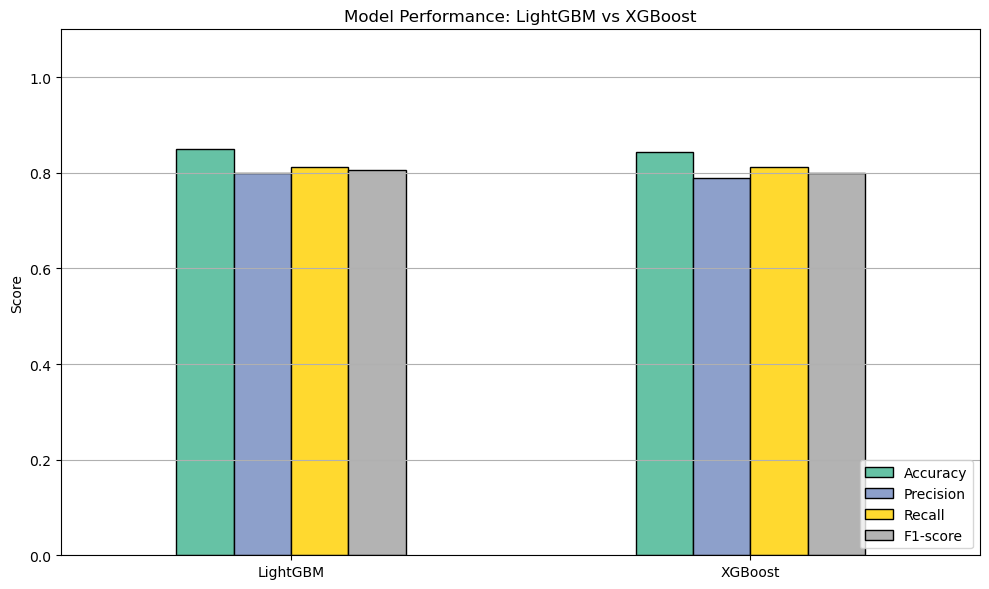

In [39]:
# Visualizing the Comparison
import matplotlib.pyplot as plt
comparison_df.plot(kind='bar', figsize=(10, 6), colormap='Set2', edgecolor='black')
plt.title('Model Performance: LightGBM vs XGBoost')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1.1)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### Comparative Analysis Report: LightGBM vs XGBoost on Titanic Dataset

### Objective:
To evaluate and compare the performance of LightGBM and XGBoost models in predicting passenger survival on the Titanic dataset using standard classification metrics.

### Model Evaluation Metrics:
| Metric    | LightGBM | XGBoost |
| --------- | -------- | ------- |
| Accuracy  | 0.849    | 0.844   |
| Precision | 0.800    | 0.789   |
| Recall    | 0.812    | 0.812   |
| F1-score  | 0.806    | 0.800
### Findings:
* LightGBM achieved slightly higher accuracy (0.849 vs. 0.844), precision (0.800 vs. 0.789), and F1-score (0.806 vs. 0.800), making it marginally better in overall performance.
    
* Both models had identical recall (0.812), indicating they were equally effective at detecting actual survivors.
    
* The difference in metrics is small, showing both models are strong contenders for this classification task.

### Practical implications:
* LightGBM provides a slight edge in overall predictive power and would be preferred in general-use applications requiring balanced performance.

* XGBoost, while slightly behind in precision and F1, still performs competitively and may benefit from further tuning or integration in ensemble methods.

* Given identical recall, both models are equally effective in minimizing false negatives—important in scenarios where failing to identify survivors is costly.

### Conclusion:
Both LightGBM and XGBoost delivered high-performing results on the Titanic dataset. LightGBM has a minor advantage in accuracy and overall balance of metrics, making it the preferred model in this comparison. However, due to the marginal differences, either model can be effectively deployed depending on further evaluation, computational constraints, or specific deployment requirements.   |
